<a href="https://colab.research.google.com/github/RomaViraj/APT/blob/master/Applied_Tech_Project_143_Solution_copy_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the lesson: 

**Land Cover Classification**

---

#### Problem Statement

As a data scientist identify the surface water bodies from the Landsat satellite dataset using MNDWI (Modified Normalized Difference Water Index).

---

#### Dataset Description

Cold Springs is a village located near New York city recieved a wildfire which was first reported on July 9, 2016. We will work on the images taken by Landsat during to identify surface water bodies and water distribution among them.

**Landsat:**The Landsat program is a series of Earth-observing satellite missions jointly managed by NASA and the U.S. Geological Survey. The naming convention from the tiff files obtained from Landsat is: 

**LXSS_LLLL_PPPRRR_YYYYMMDD_yyyymmdd_CC_TX**

Where, 
    
    L = Landsat
    X = Sensor Used 
    SS = Satellite 
    LLLL = Processing correction level
    PPP = WRS path
    RRR = WRS row
    YYYYMMDD = Acquisition year, month, day
    yyyymmdd - Processing year, month, day
    CC = Collection number
    TX = Collection category
    
Example:  **LC08_L1GT_029030_20151209_20160131_01_RT**

Means: Landsat 8; OLI/TIRS combined; processing correction level L1GT; path 029; row 030; acquired December 9, 2015; processed January 31, 2016; Collection 1; Real-Time

**Dataset Citation:** Lab, Earth; Wasser, Leah (2018): Earth Analytics: Cold Springs Fire Remote Sensing Data. figshare. Dataset. https://doi.org/10.6084/m9.figshare.6083210.v1 

---

### List of Activities
 
**Activity 1:** Import Modules and Read Data

**Activity 2:** Plotting Composite RGB Image and Obtain MNDWI

---

#### Activity 1: Import Modules and Read Data

1. Import the necessary Python modules and download the `cold-springs-fire` dataset from the `earthpy` package.

2. Get the files containing the `band` word and that end with `.tif` using `glob()` function. 

In [ ]:
# Install 'earthpy' package
! pip install earthpy

     |████████████████████████████████| 1.4 MB 4.2 MB/s 
     |████████████████████████████████| 1.0 MB 38.0 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 6.3 MB 39.3 MB/s 
     |████████████████████████████████| 16.7 MB 29.5 MB/s 


Download `cold-springs-fire` dataset from the `earthpy` package.

In [ ]:
# Import the 'earthpy' library
import earthpy as ep

# Specify a custom directory for data downloads using the 'path' attribute.
ep.data.path = "."

# Specify the dataset name to download using 'data.get_data()' function.
ep.data.get_data("cold-springs-fire")

Extracted output to ./cold-springs-fire/.


'./cold-springs-fire/.'

Get files containing the `band` word and that end with `.tif`.

Steps to obtain the files:
1. Import `glob` module as `gb`.

2. Use `glob()` function of `gb` and pass the pattern of the file name. 

  The pattern would be: `cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/*band*.tif`

3. Sort the files and display the extracted paths.

In [ ]:
# Import the 'glob' library
import glob as gb

# Grab files containing the word "band" and that end with .tif
landsat_path = gb.glob("cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/*band*.tif")

# Sort the Bands
landsat_path.sort()
landsat_path

['cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band7_crop.tif']

Creating a stacked image using `stack()` function.

To create an image stack for Landsat data, perform the following steps:

1. Import `earthpy.spatial` as `es`.
2. Call `stack()` function and pass the sorted list of 7 spectral bands as input to this function. And store result in 2 variables (stacked array and metadata).
3. Create a `for` loop with metadata and print each feature in the stacked array.

In [ ]:
# Import the 'earthpy.spatial' library
import earthpy.spatial as es

# Create image stack for Landsat
arr_st, meta = es.stack(landsat_path)

# Print the metadata 
for key,value in meta.items():
  print(f"{key} : {value}")

driver : GTiff
dtype : int16
nodata : -32768.0
width : 246
height : 177
count : 7
crs : EPSG:32613
transform : | 30.00, 0.00, 455655.00|
| 0.00,-30.00, 4428465.00|
| 0.00, 0.00, 1.00|
tiled : False
compress : lzw
interleave : band


**Q:** What is the width and height of the dataset?

**A:** Width: 246 and height: 177.



---



#### Activity 2: Plotting Composite RGB Image and Obtain MNDWI

1. Plot RGB Stretched Composite image using `plot_rgb()` function to get a clear image of the area.

2. Plot MNDWI image using `plot_bands()` function to get the water bodies of the area.

Plot RGB Stretched Composite image using `plot_rgb()` function.

Steps to plot RGB Composite Stretched image:

1. Import `earthpy.plot` and `matplotlib.pyplot`.

2. Plot using `plot_rgb()` function of `earthpy.plot` passing the stacked array, `rgb = (3, 2, 1)`, `stretch = True`, `str_clip = 9` as input, as well as a suitable title.

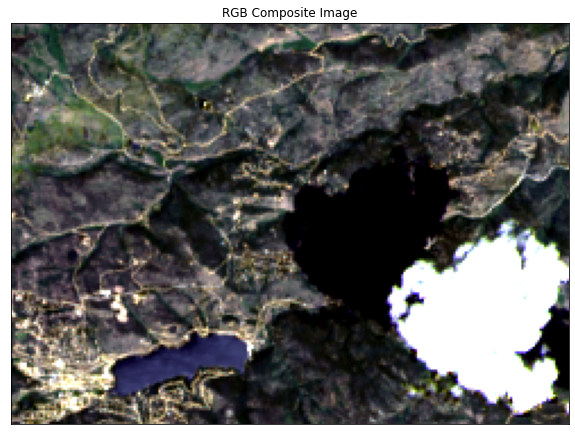

In [ ]:
# Import required libraries
import earthpy.plot as epp
import matplotlib.pyplot as plt

# Plot the RGB composite image
epp.plot_rgb(arr_st, rgb = (3, 2, 1), stretch=True, str_clip=9, 
             title ='RGB Composite Image')
plt.show()

Plotting MNDWI (Modified Normalized Difference Water Index) to show the water bodies.

Steps to plot MNDWI :

1. Calculate MNDWI using `normalized_diff()` function of `earthpy.spatial` with input as Band 3 and Band 7 (2nd and 6th index of the stacked array).

2. Plot using `plot_bands()` function of `earthpy.plot` passing the calculated MNDWI, a suitable title, `cmap = 'RdYlGn'`, `vmin = -1`, and `vmax = 1`.

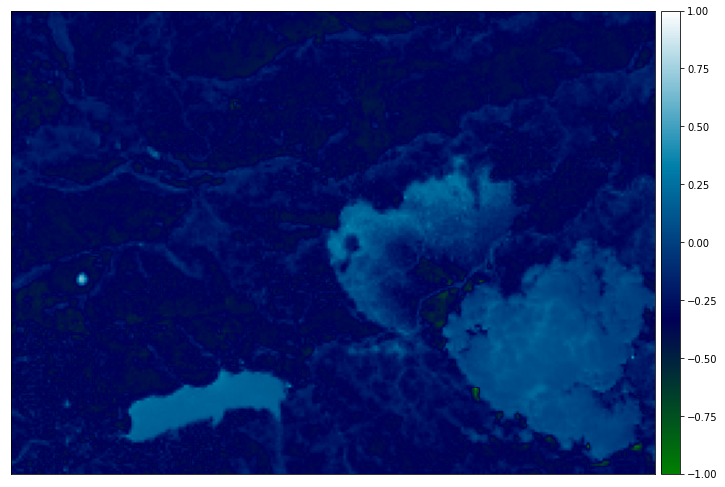

In [ ]:
# Calculate and plot MNDWI
mndwi = es.normalized_diff(arr_st[2], arr_st[6])
epp.plot_bands(mndwi, cmap = "ocean", vmin = -1, vmax = 1)
plt.show()

**Q:** Which portion shows the water bodies?

**A:** The light blue portion in the down.


**Q:** Do the plot obtained from MNDWI agrees with the RGB composite image?

**A:** Yes



---

